# Importing Libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
raw_data = pd.read_csv("/content/comprehensive_mutual_funds_data.csv")
raw_data.head(5)

,s,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


# Validating the data

In [5]:
raw_data.info() #comprehend the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   s              814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [6]:
raw_data= raw_data.fillna(0)
raw_data.isnull().sum() #check for null values



,0
s,0
min_sip,0
min_lumpsum,0
expense_ratio,0
fund_size_cr,0
fund_age_yr,0
fund_manager,0
sortino,0
alpha,0
sd,0


# Exploratiory Data Analysis of Mutual Funds

## Minimum SIP Amount Required

Plot saved as Minimum_SIP_Amount.jpg


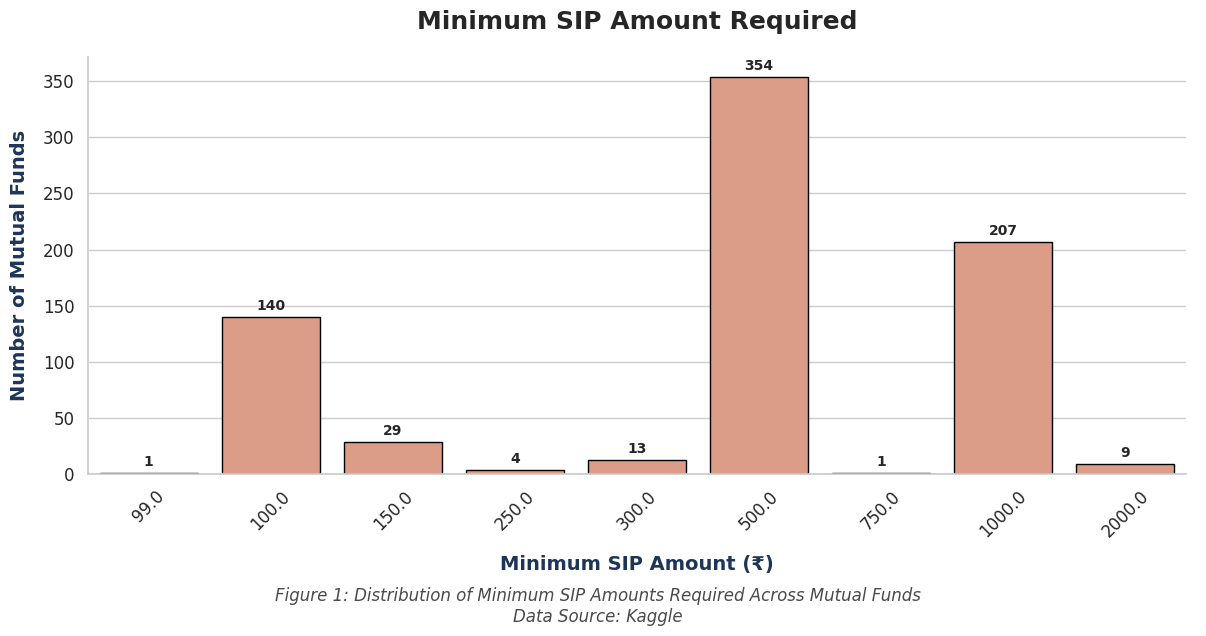

In [7]:

# Set theme for the plots
sns.set_theme(style="whitegrid")

# Filter and process data
minimum_sip_amount_data = raw_data.groupby('s')['min_sip'].mean().sort_values(ascending=True).reset_index()
minimum_sip_amount_data = minimum_sip_amount_data[
    (minimum_sip_amount_data.min_sip != 0) &
    (minimum_sip_amount_data.min_sip != 33.333333333333336)
]

# Create the categorical plot
plot = sns.catplot(
    data=minimum_sip_amount_data,
    x="min_sip",
    kind="count",
    color='darksalmon',
    edgecolor='black',
    height=6,
    aspect=2
)

# Add annotations for bar heights
ax = plot.ax  # Access the Axes object
for bar in ax.patches:
    ax.annotate(
        text=f"{int(bar.get_height())}",
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='center',
        size=10,
        xytext=(0, 8),
        textcoords='offset points',
        fontweight='bold'
    )

# Customize plot aesthetics
ax.set_title(
    'Minimum SIP Amount Required',
    fontsize=18,
    weight='bold',
    pad=20
)
ax.set_xlabel(
    'Minimum SIP Amount (₹)',
    fontsize=14,
    labelpad=10,
    weight='bold',
    color="#1D3557"
)
ax.set_ylabel(
    'Number of Mutual Funds',
    fontsize=14,
    labelpad=10,
    weight='bold',
    color="#1D3557"
)
ax.tick_params(
    axis='x',
    labelsize=12,
    rotation=45  # Rotate x-axis labels for better readability
)
ax.tick_params(
    axis='y',
    labelsize=12
)

# Adjust layout for academic presentation
plt.tight_layout()

# Add a descriptive footer for context
plt.figtext(
    0.5, -0.05,
    "Figure 1: Distribution of Minimum SIP Amounts Required Across Mutual Funds\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)


plt.savefig("Minimum_SIP_Amount.jpg", format="jpg", dpi=300)
print("Plot saved as Minimum_SIP_Amount.jpg")


# Display the plot
plt.show()



## Minimum Lumpsum Amount Required

Plot saved as Minimum_Lumpsum_Amount.jpg


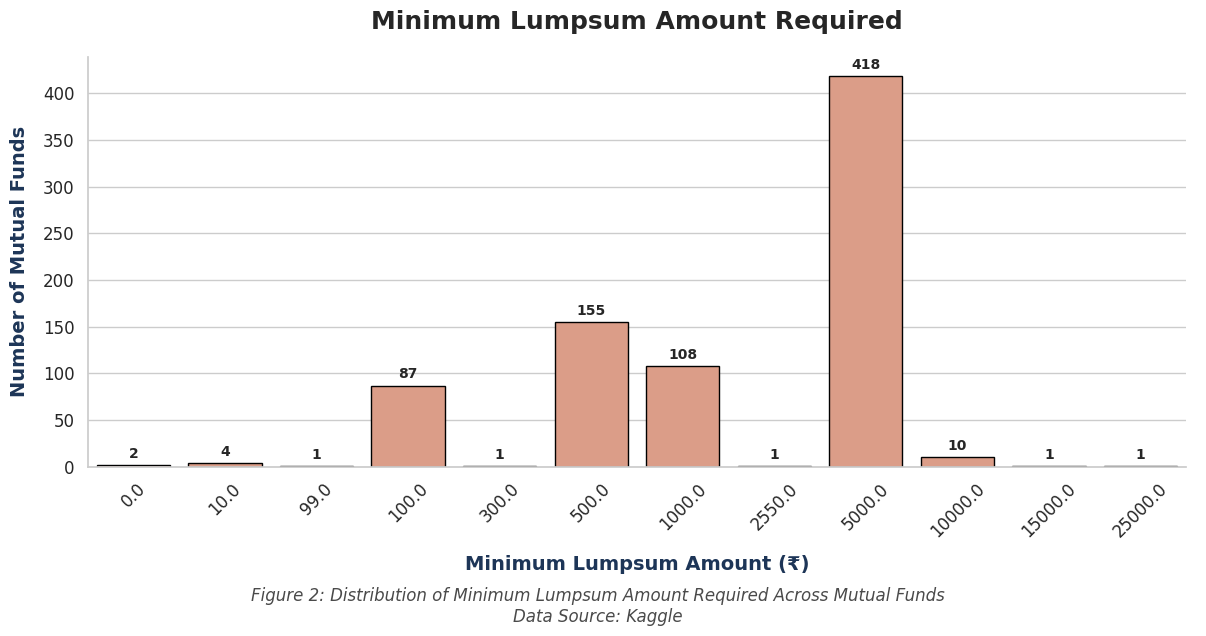

In [8]:
minimum_lumpsum_amount_data = raw_data.groupby('s')['min_lumpsum'].median().sort_values(ascending=True).reset_index()

# Set theme for the plots
sns.set_theme(style="whitegrid")

# Create the categorical plot
plot = sns.catplot(
    data=minimum_lumpsum_amount_data,
    x="min_lumpsum",
    kind="count",
    color='darksalmon',
    edgecolor='black',
    height=6,
    aspect=2
)

# Add annotations for bar heights
ax = plot.ax  # Access the Axes object
for bar in ax.patches:
    ax.annotate(
        text=f"{int(bar.get_height())}",
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='center',
        size=10,
        xytext=(0, 8),
        textcoords='offset points',
        fontweight='bold'
    )

# Customize plot aesthetics
ax.set_title(
    'Minimum Lumpsum Amount Required',
    fontsize=18,
    weight='bold',
    pad=20
)
ax.set_xlabel(
    'Minimum Lumpsum Amount (₹)',
    fontsize=14,
    labelpad=10,
    weight='bold',
    color="#1D3557"
)
ax.set_ylabel(
    'Number of Mutual Funds',
    fontsize=14,
    labelpad=10,
    weight='bold',
    color="#1D3557"
)
ax.tick_params(
    axis='x',
    labelsize=12,
    rotation=45  # Rotate x-axis labels for better readability
)
ax.tick_params(
    axis='y',
    labelsize=12
)

# Adjust layout for academic presentation
plt.tight_layout()

# Add a descriptive footer for context
plt.figtext(
    0.5, -0.05,
    "Figure 2: Distribution of Minimum Lumpsum Amount Required Across Mutual Funds\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Minimum_Lumpsum_Amount.jpg", format="jpg", dpi=300)
print("Plot saved as Minimum_Lumpsum_Amount.jpg")

# Display the plot
plt.show()





## Median of Expense Ratio of AMC's

Plot saved as Median_of_Expense_Ratios_of_AMC.jpg


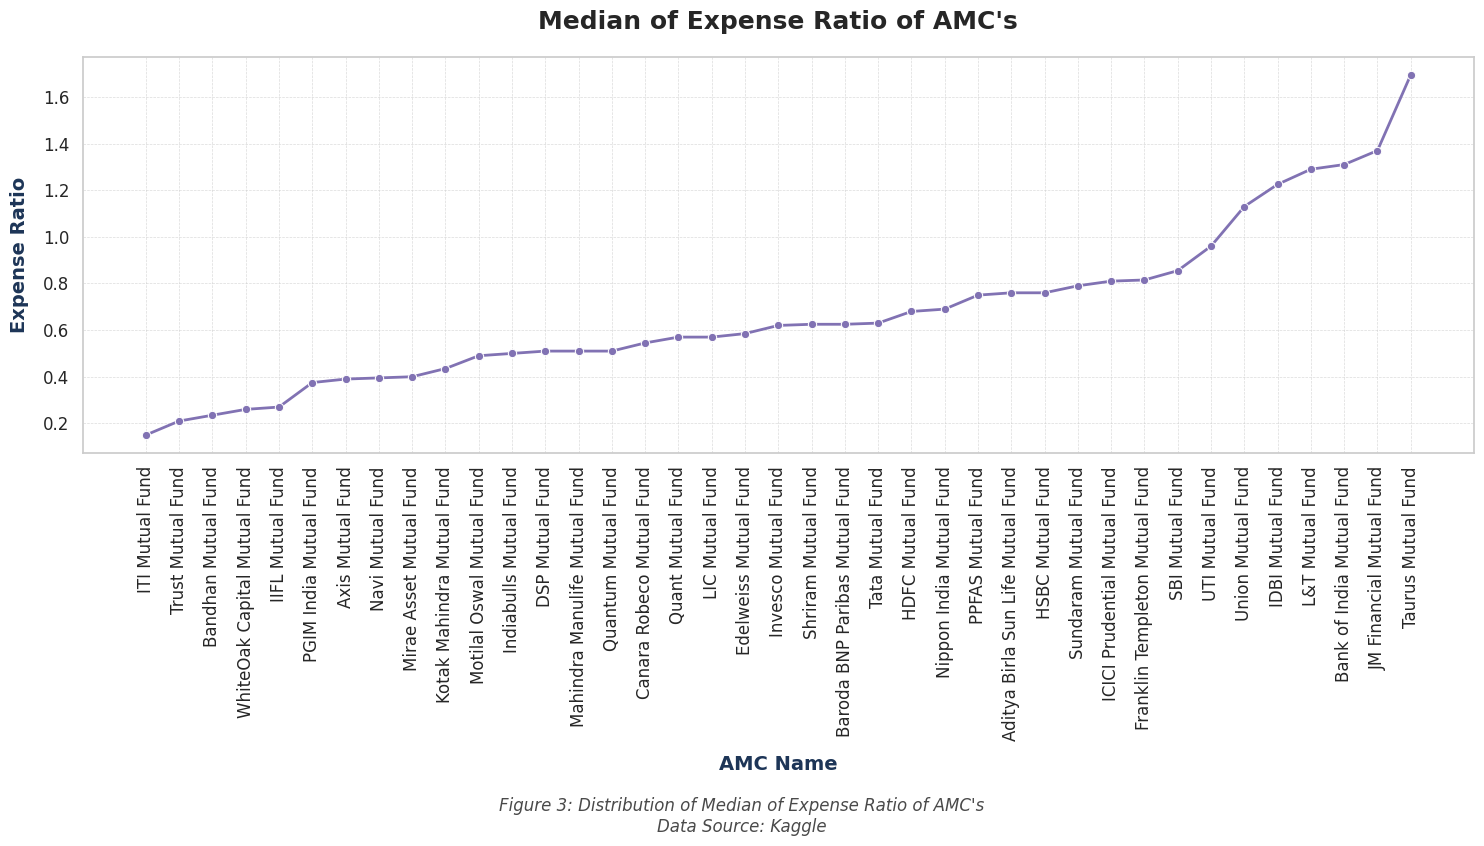

In [9]:
minimum_expense_ratio_data= raw_data.groupby('amc_name')['expense_ratio'].median().sort_values(ascending=True).reset_index()
# Set a clean theme
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 8))  # Set figure size
sns.lineplot(
    data=minimum_expense_ratio_data,
    x="amc_name",
    y="expense_ratio",
    color="m",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points

)

# Customize the plot
plt.title("Median of Expense Ratio of AMC's", fontsize=18, weight='bold', pad=20)
plt.xlabel("AMC Name", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.ylabel("Expense Ratio", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Save and display the plot
# Adjust layout for academic presentation
plt.tight_layout()

# Add a descriptive footer for context
plt.figtext(
    0.5, -0.05,
    "Figure 3: Distribution of Median of Expense Ratio of AMC's\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Median_of_Expense_Ratios_of_AMC.jpg", format="jpg", dpi=300)
print("Plot saved as Median_of_Expense_Ratios_of_AMC.jpg")

plt.show()



## Average Rating of each AMC

Plot saved as Average_Rating_of_each_AMC.jpg


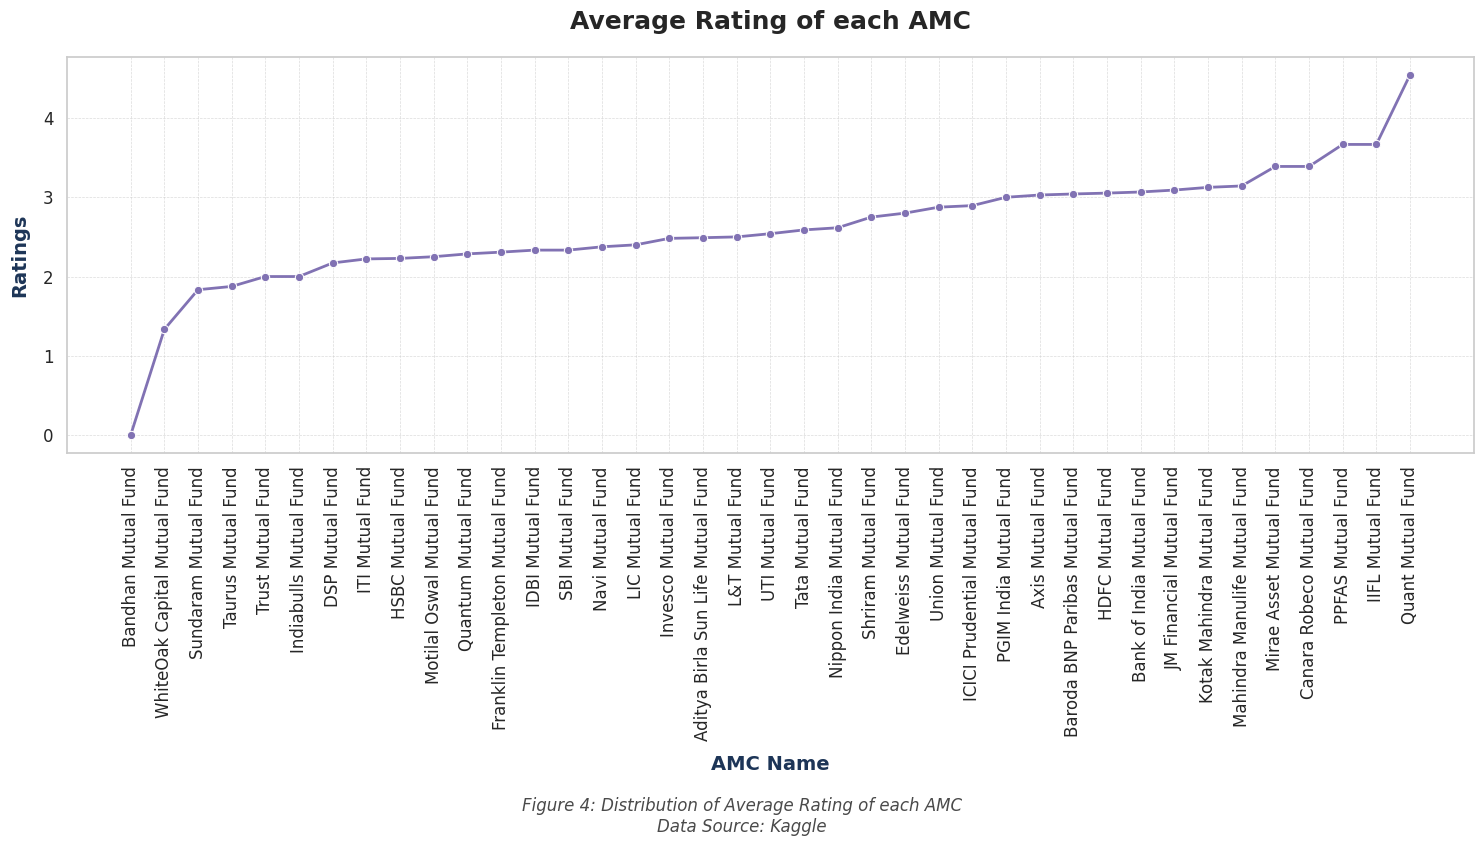

In [10]:
rating_by_amcname = raw_data.groupby('amc_name')['rating'].mean().sort_values(ascending=True).reset_index()

sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 8))  # Set figure size
sns.lineplot(
    data=rating_by_amcname,
    x="amc_name",
    y="rating",
    color="m",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points

)

# Customize the plot
plt.title("Average Rating of each AMC", fontsize=18, weight='bold', pad=20)
plt.xlabel("AMC Name", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.ylabel("Ratings", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

# Add a descriptive footer for context
plt.figtext(
    0.5, -0.05,
    "Figure 4: Distribution of Average Rating of each AMC\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Average_Rating_of_each_AMC.jpg", format="jpg", dpi=300)
print("Plot saved as Average_Rating_of_each_AMC.jpg")

plt.show()


## Average Returns of AMC

Plot saved as Average_Returns_of_each_AMC.jpg


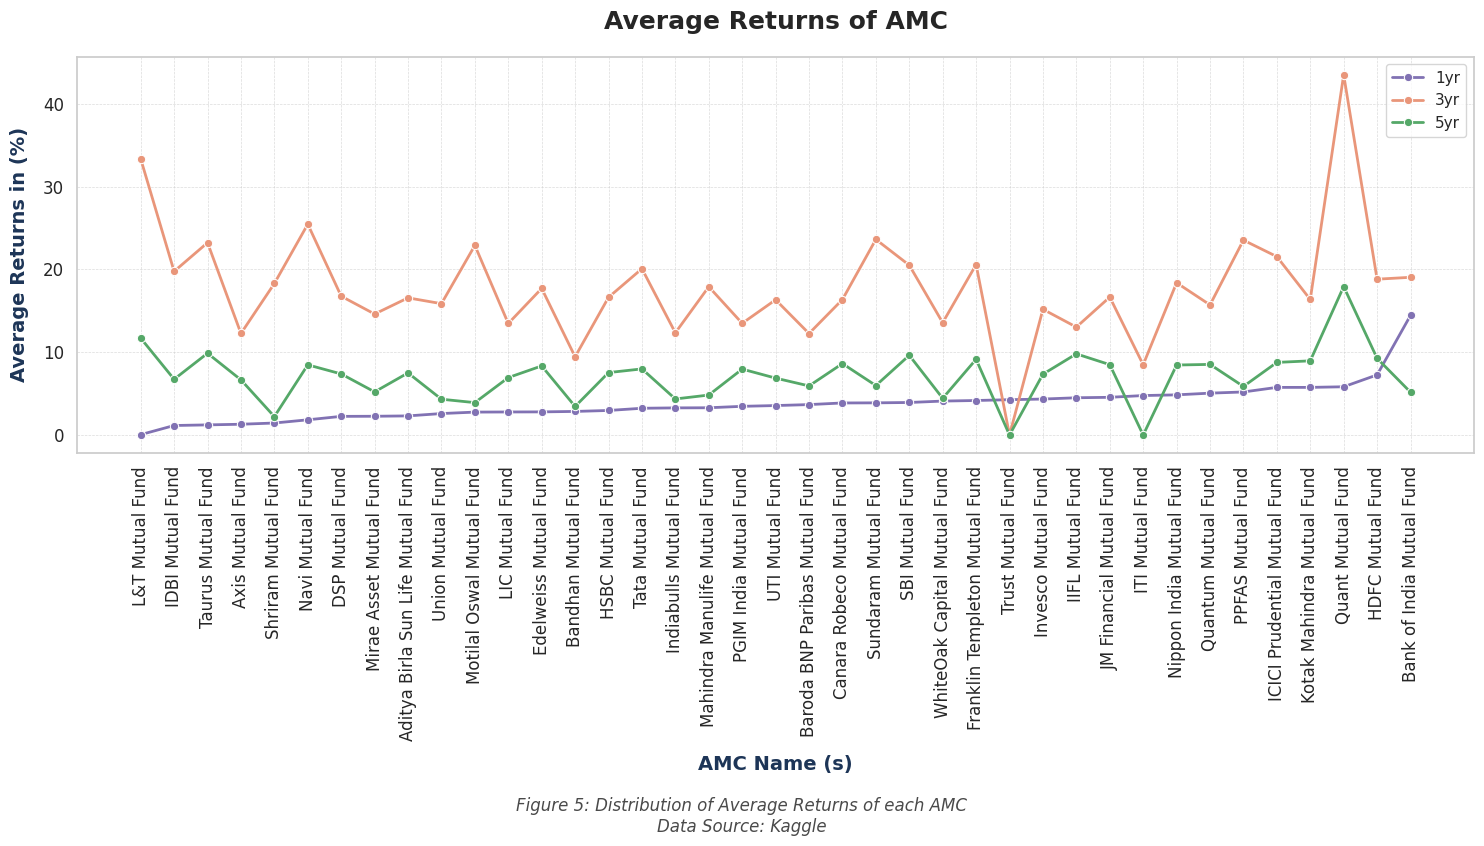

In [11]:
amcname_by_returns_per_year = raw_data.groupby('amc_name')['returns_1yr'].mean().sort_values(ascending=True).reset_index()

amcname_by_returns_per_3year = raw_data.groupby('amc_name')['returns_3yr'].mean().sort_values(ascending=True).reset_index()

amcname_by_returns_per_5year = raw_data.groupby('amc_name')['returns_5yr'].mean().sort_values(ascending=True).reset_index()

sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 8))  # Set figure size
sns.lineplot(
    data=amcname_by_returns_per_year,
    x="amc_name",
    y="returns_1yr",
    color="m",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points
    label="1yr"

)

sns.lineplot(
    data=amcname_by_returns_per_3year,
    x="amc_name",
    y="returns_3yr",
    color="darksalmon",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points
    label="3yr"

)

sns.lineplot(
    data=amcname_by_returns_per_5year,
    x="amc_name",
    y="returns_5yr",
    color="g",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points
    label="5yr"

)

# Customize the plot
plt.title("Average Returns of AMC", fontsize=18, weight='bold', pad=20)
plt.xlabel("AMC Name (s)", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.ylabel("Average Returns in (%)", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

# Add a descriptive footer for context
plt.figtext(
    0.5, -0.05,
    "Figure 5: Distribution of Average Returns of each AMC\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Average_Returns_of_each_AMC.jpg", format="jpg", dpi=300)
print("Plot saved as Average_Returns_of_each_AMC.jpg")

plt.show()


## Mean Standard Deviation of AMC

Plot saved as Mean_Standard_Deviation_of_AMC.jpg


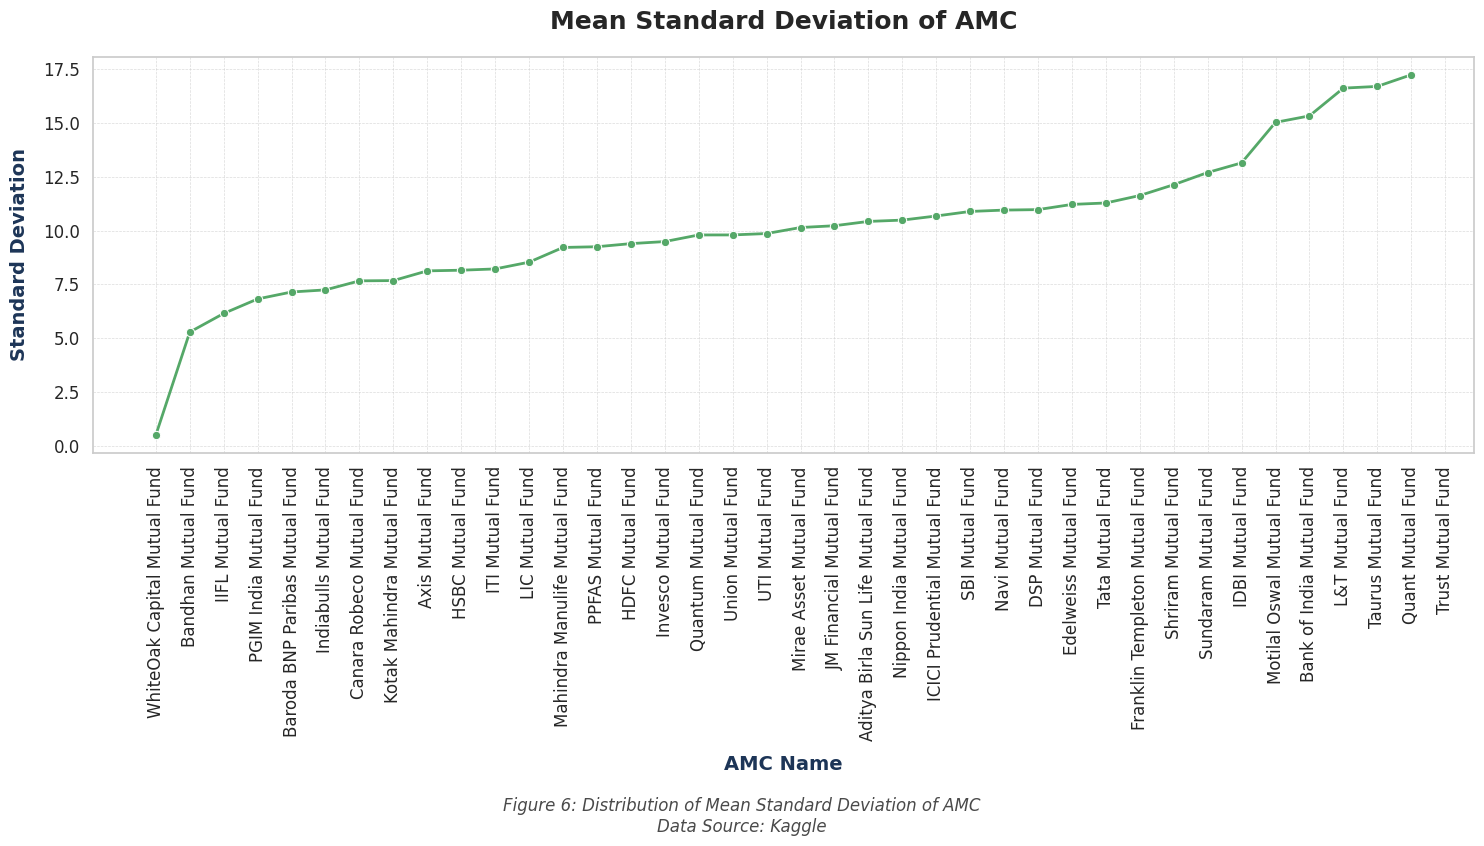

In [12]:
# Convert 'sd' column to numeric, handling errors
raw_data['sd'] = pd.to_numeric(raw_data['sd'], errors='coerce')

# Calculate the mean of standard deviation, ignoring non-numeric values
std_deviation = raw_data.groupby('amc_name')['sd'].mean().sort_values(ascending=True).reset_index()

# Set a clean theme
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 8))  # Set figure size
sns.lineplot(
    data=std_deviation,
    x="amc_name",
    y="sd",
    color="g",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points

)

# Customize the plot
plt.title("Mean Standard Deviation of AMC", fontsize=18, weight='bold', pad=20)
plt.xlabel("AMC Name", fontsize=14, labelpad=10, color="#1D3557" , weight='bold')
plt.ylabel("Standard Deviation", fontsize=14, labelpad=10, color="#1D3557" , weight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

# Add a descriptive footer for context
plt.figtext(
    0.5, -0.05,
    "Figure 6: Distribution of Mean Standard Deviation of AMC\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Mean_Standard_Deviation_of_AMC.jpg", format="jpg", dpi=300)
print("Plot saved as Mean_Standard_Deviation_of_AMC.jpg")

plt.show()


## Average Returns and Standard Deviation of AMC

Plot saved as Avg_returns_Standard_Deviation_of_AMC.jpg


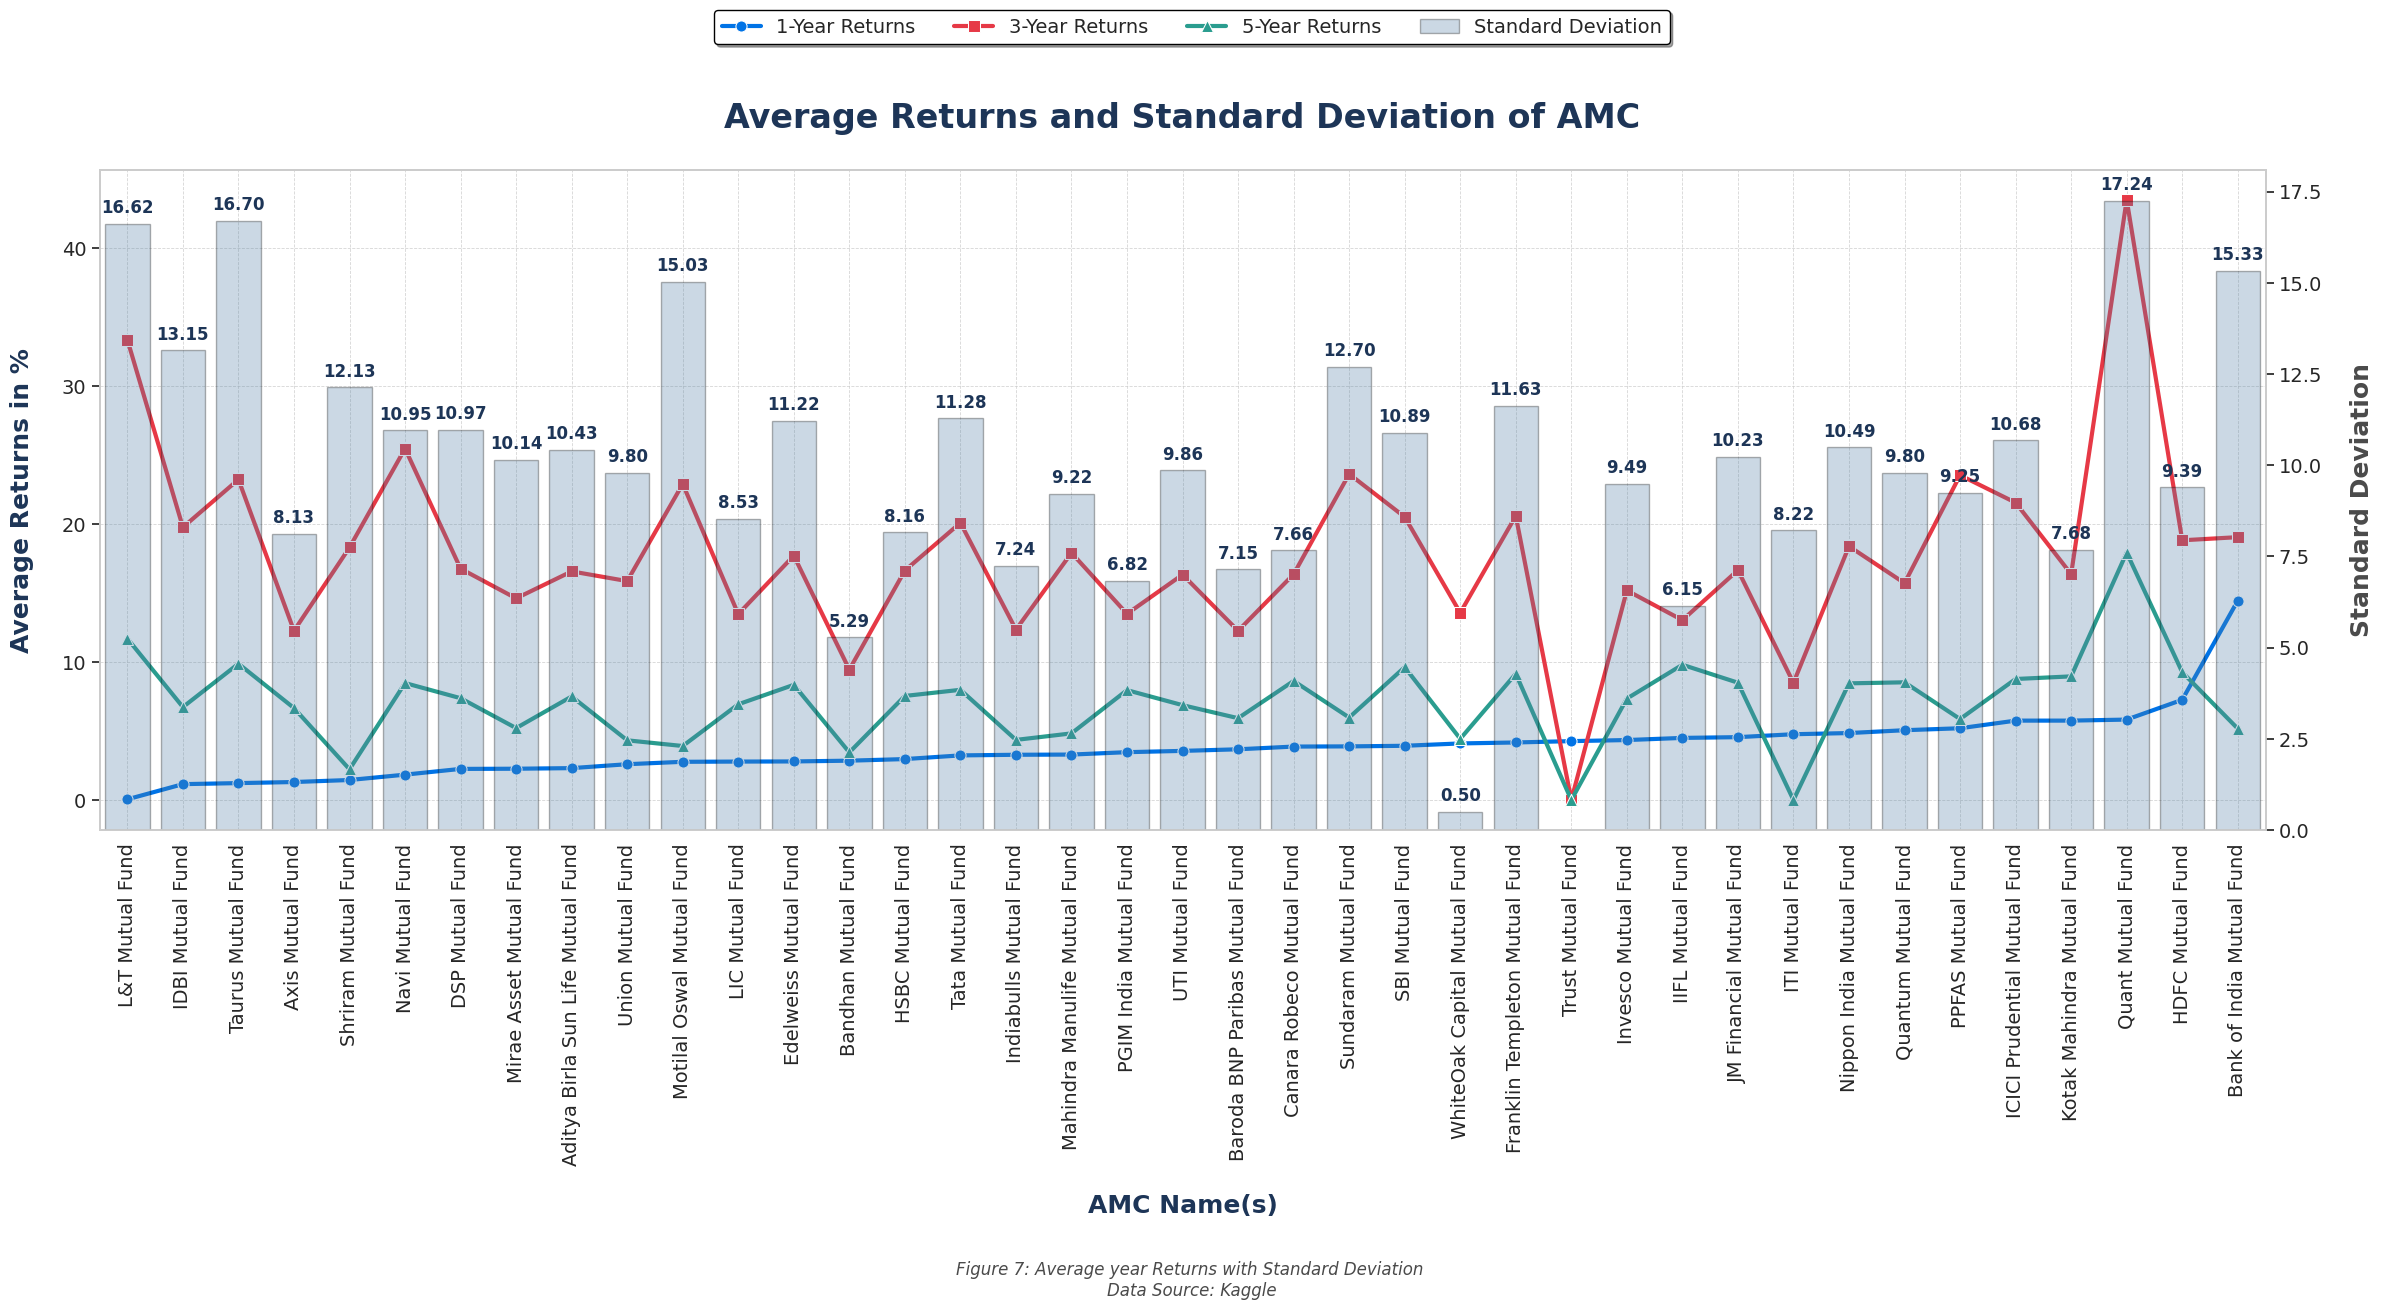

In [17]:

# Set theme for the plot
sns.set_theme(style="whitegrid")

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(24, 12))  # Larger figure size for detailed visuals

# Line plot for 1-year, 3-year, and 5-year returns
sns.lineplot(
    ax=ax1,
    data=amcname_by_returns_per_year,
    x="amc_name",
    y="returns_1yr",
    color="#0073E6",  # Professional blue color
    linewidth=3,
    marker="o",
    markersize=8,
    label="1-Year Returns"
)

sns.lineplot(
    ax=ax1,
    data=amcname_by_returns_per_3year,
    x="amc_name",
    y="returns_3yr",
    color="#E63946",  # Bold red for contrast
    linewidth=3,
    marker="s",
    markersize=8,
    label="3-Year Returns"
)

sns.lineplot(
    ax=ax1,
    data=amcname_by_returns_per_5year,
    x="amc_name",
    y="returns_5yr",
    color="#2A9D8F",  # Elegant teal color
    linewidth=3,
    marker="^",
    markersize=8,
    label="5-Year Returns"
)

# Customize the primary axis
ax1.set_title(
    "Average Returns and Standard Deviation of AMC",
    fontsize=24, weight='bold', pad=30, color="#1D3557"
)
ax1.set_xlabel("AMC Name(s)", fontsize=18, labelpad=20, weight='bold', color="#1D3557")
ax1.set_ylabel("Average Returns in %", fontsize=18, labelpad=20, weight='bold', color="#1D3557")
ax1.tick_params(axis='x', labelsize=14, rotation=90)  # Slanted x-axis labels for readability
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(visible=True, which='major', linestyle='--', linewidth=0.6, alpha=0.8)

# Create a secondary y-axis for the bar plot
ax2 = ax1.twinx()

std_deviation = raw_data.groupby('amc_name')['sd'].mean().sort_values(ascending=True).reset_index()

# Bar plot for standard deviation
bars = sns.barplot(
    ax=ax2,
    data=std_deviation,
    x="amc_name",
    y="sd",
    color="#4682B4",  # Steel blue color for the bars
    alpha=0.3,  # Transparent bars
    edgecolor='black'
)

# Customize the secondary axis
ax2.set_ylabel("Standard Deviation", fontsize=18, labelpad=20, weight='bold', color="#4A4A4A")
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(visible=False)  # Disable grid for the secondary axis

# Add annotations to the bar plot
for bar in ax2.patches:
    ax2.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom',
        size=12, xytext=(0, 5),
        textcoords='offset points',
        fontweight='bold',
        color="#1D3557"  # Deep navy-blue text color
    )

# Remove the unwanted legend on the left side
ax1.legend_.remove()

# Adjust legend placement above the graph
handles, labels = ax1.get_legend_handles_labels()
handles.append(bars.patches[0])  # Append bar handle for the standard deviation
labels.append("Standard Deviation")  # Append corresponding label
fig.legend(
    handles=handles,
    labels=labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.03),  # Centered above the graph
    ncol=4,  # Arrange legend entries in a single row
    fontsize=14,
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=1,
    edgecolor="black"
)

# Adjust layout for clean visuals
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the legend above

# Add a footer
fig.text(
    0.5, -0.05,
    "Figure 7: Average year Returns with Standard Deviation \nData Source: Kaggle",
    ha='center', fontsize=12, color="#4A4A4A", style='italic'
)

plt.savefig("Avg_returns_Standard_Deviation_of_AMC.jpg", format="jpg", dpi=300)
print("Plot saved as Avg_returns_Standard_Deviation_of_AMC.jpg")

# Display the plot
plt.show()


## Mean Risk Level of AMC

Plot saved as Mean_Risk_Level_of_AMC.jpg


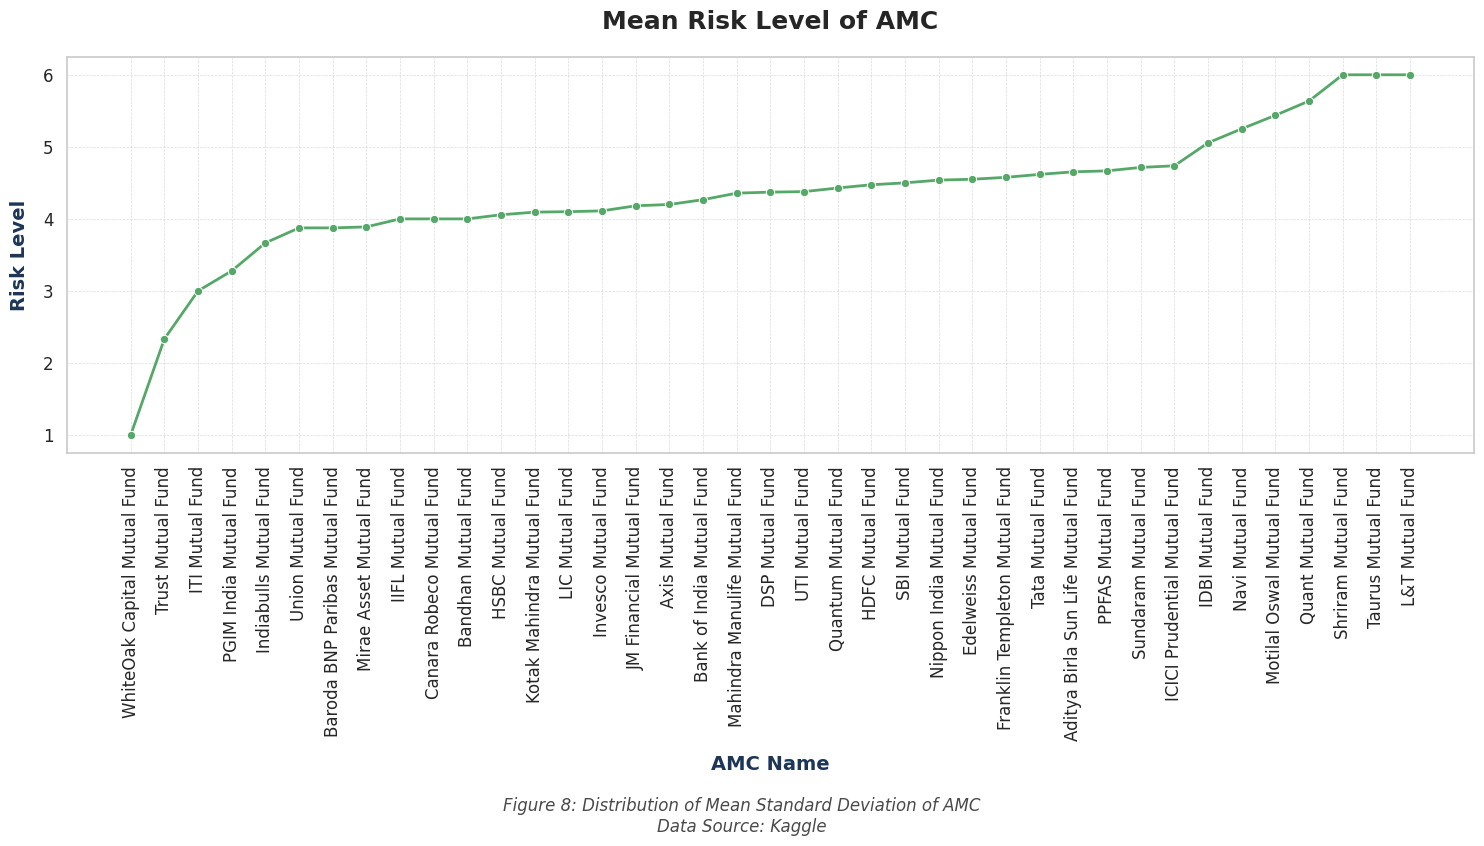

In [14]:
# Calculate the mean of standard deviation, ignoring non-numeric values
std_deviation = raw_data.groupby('amc_name')['risk_level'].mean().sort_values(ascending=True).reset_index()

# Set a clean theme
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 8))  # Set figure size
sns.lineplot(
    data=std_deviation,
    x="amc_name",
    y="risk_level",
    color="g",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points

)

# Customize the plot
plt.title("Mean Risk Level of AMC", fontsize=18, weight='bold', pad=20)
plt.xlabel("AMC Name", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.ylabel("Risk Level", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.figtext(
    0.5, -0.05,
    "Figure 8: Distribution of Mean Standard Deviation of AMC\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Mean_Risk_Level_of_AMC.jpg", format="jpg", dpi=300)
print("Plot saved as Mean_Risk_Level_of_AMC.jpg")

# Display the plot
plt.show()

## Volatility of AMC

Plot saved as Volatility.jpg


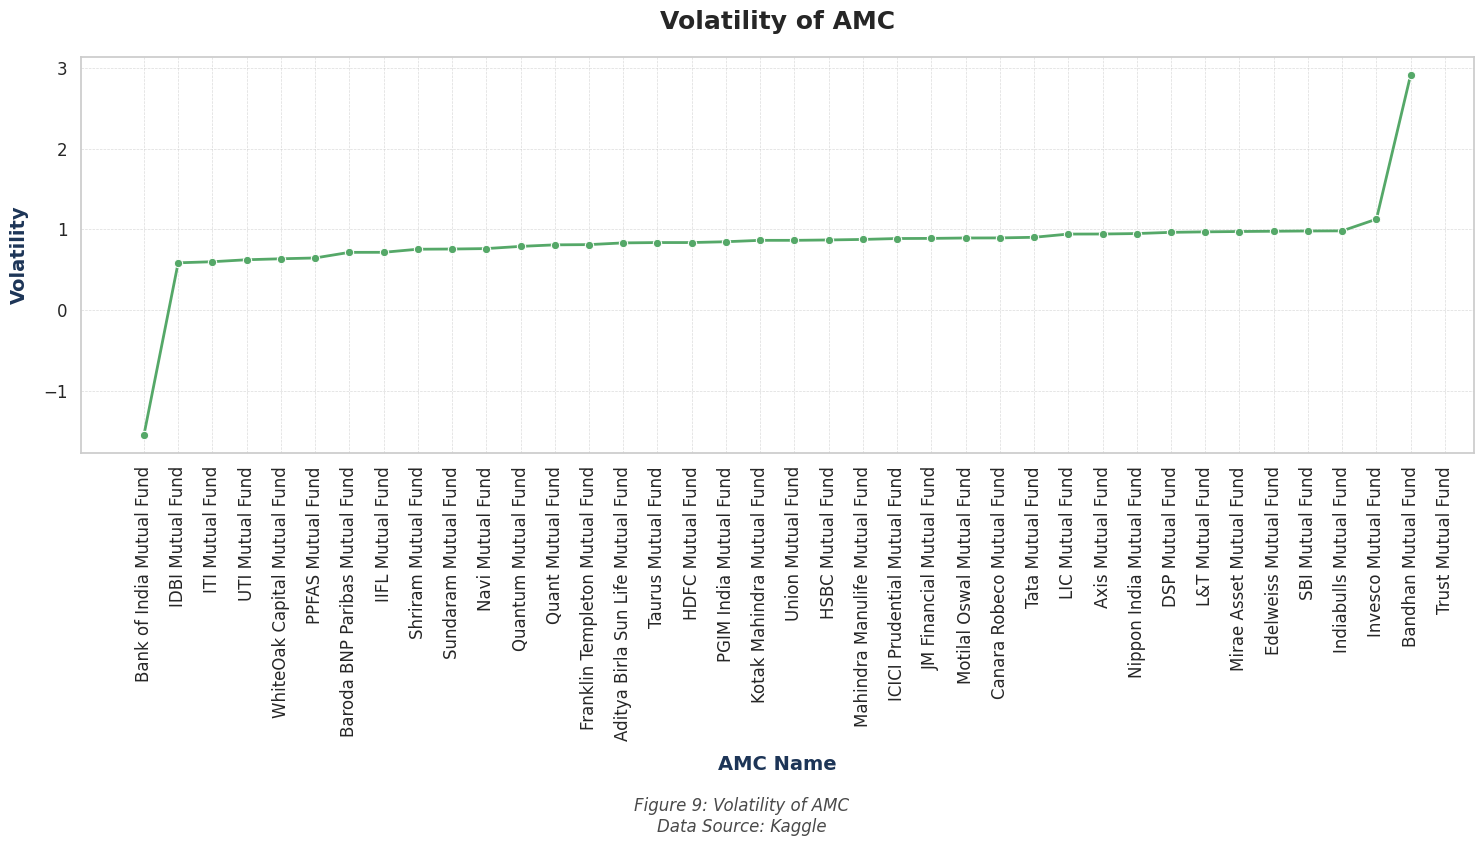

In [15]:
# Calculate the mean of standard deviation, ignoring non-numeric values
# Convert 'beta' column to numeric, handling errors
raw_data['beta'] = pd.to_numeric(raw_data['beta'], errors='coerce')

# Calculate the mean of standard deviation, ignoring non-numeric values
volatility = raw_data.groupby('amc_name')['beta'].mean().sort_values(ascending=True).reset_index()

# Set a clean theme
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 8))  # Set figure size
sns.lineplot(
    data=volatility,
    x="amc_name",
    y="beta",
    color="g",
    linewidth=2,  # Set line width
    marker="o" , # Add markers for data points

)

# Customize the plot
plt.title("Volatility of AMC", fontsize=18, weight='bold', pad=20)
plt.xlabel("AMC Name", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.ylabel("Volatility", fontsize=14, labelpad=10, weight='bold', color="#1D3557")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.figtext(
    0.5, -0.05,
    "Figure 9: Volatility of AMC\nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)
plt.savefig("Volatility.jpg", format="jpg", dpi=300)
print("Plot saved as Volatility.jpg")

plt.show()



## Comparison of 1-Year, 3-Year, and 5-Year Returns

Plot saved as Comparsion.jpg


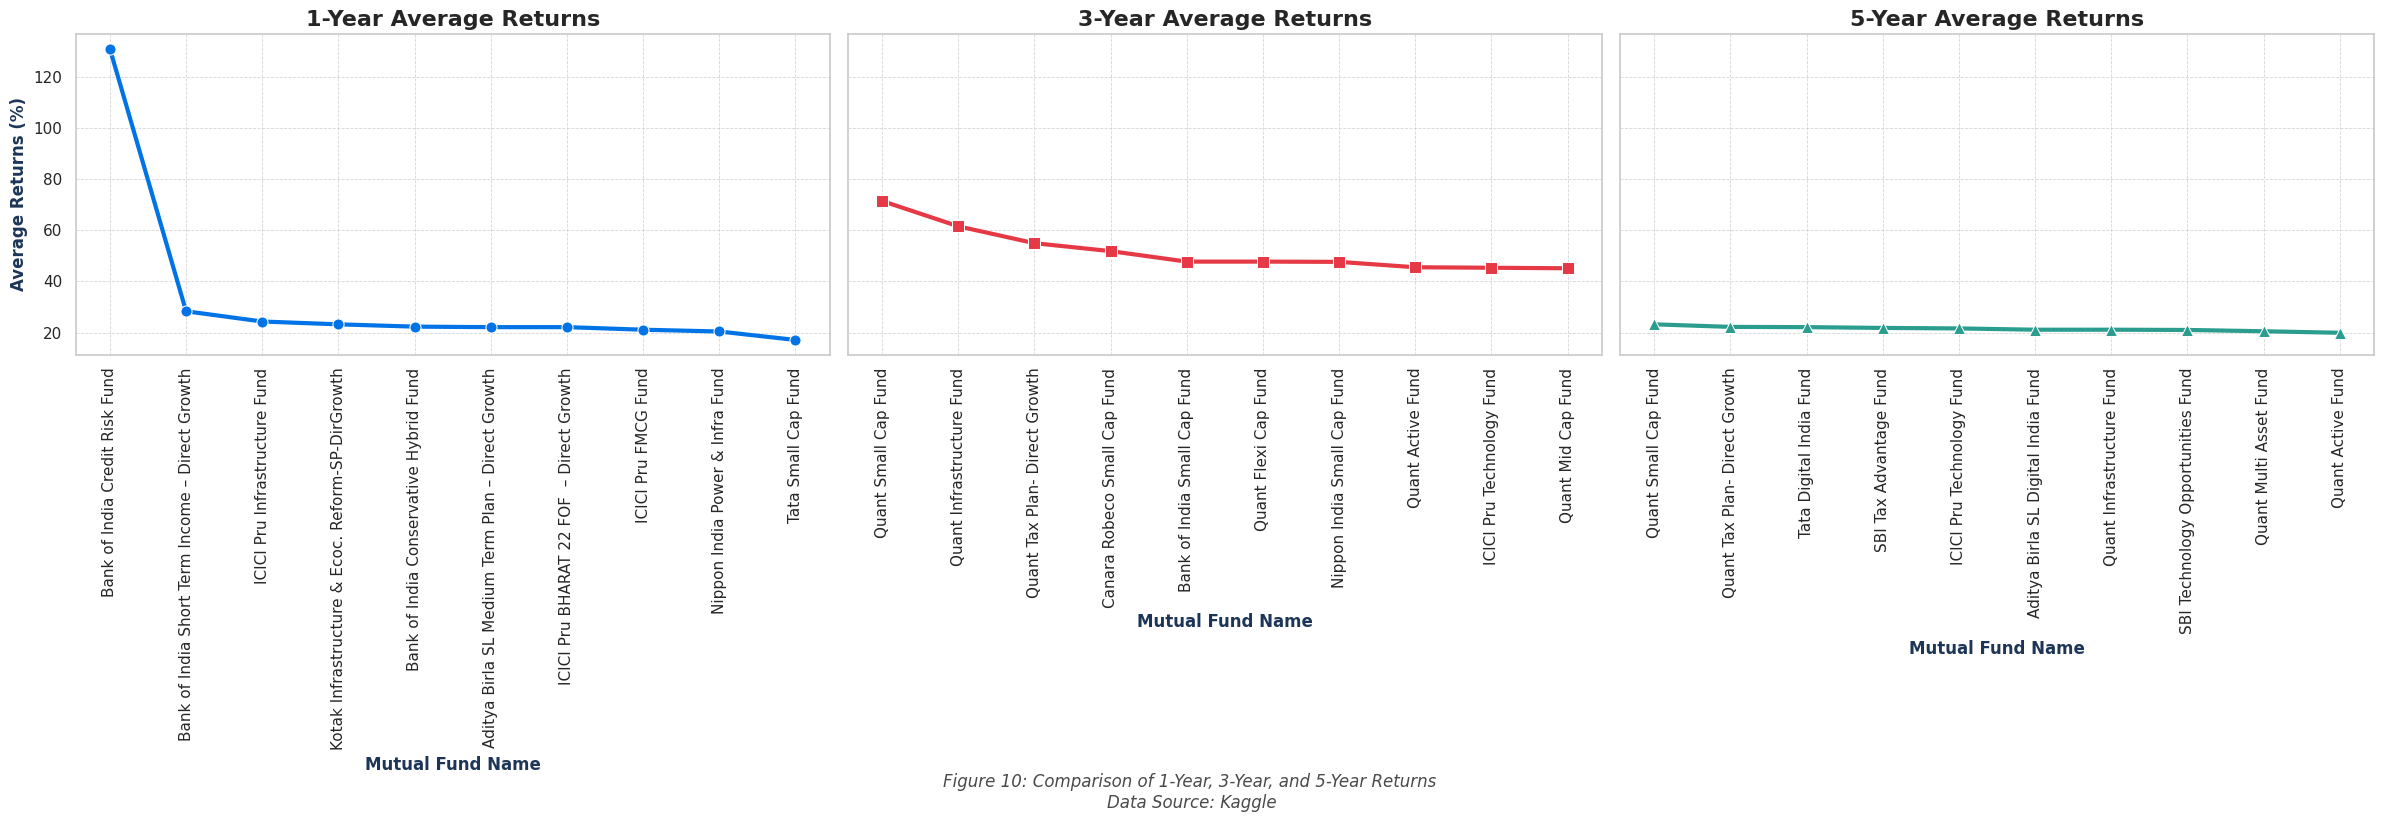

In [16]:
mf_by_returns_per_year = raw_data.groupby('s')['returns_1yr'].mean().sort_values(ascending=False).reset_index().head(10)

mf_by_returns_per_3year = raw_data.groupby('s')['returns_3yr'].mean().sort_values(ascending=False).reset_index().head(10)

mf_by_returns_per_5year = raw_data.groupby('s')['returns_5yr'].mean().sort_values(ascending=False).reset_index().head(10)

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

# Plot for 1-Year Returns
sns.lineplot(
    ax=axes[0],
    data=mf_by_returns_per_year,
    x="s",  # Ensure column name matches the dataset
    y="returns_1yr",
    color="#0073E6",  # Professional blue
    linewidth=3,
    marker="o",
    markersize=8
)
axes[0].set_title(
    "1-Year Average Returns",
    fontsize=16,
    weight='bold'
)
axes[0].set_xlabel(
    "Mutual Fund Name",
    fontsize=12,
    weight='bold',
    color="#1D3557"
)
axes[0].set_ylabel(
    "Average Returns (%)",
    fontsize=12,
    weight='bold',
    color="#1D3557"
)
axes[0].tick_params(
    axis='x',
    rotation=90
)
axes[0].grid(
    visible=True,
    linestyle='--',
    linewidth=0.6,
    alpha=0.8
)

# Plot for 3-Year Returns
sns.lineplot(
    ax=axes[1],
    data=mf_by_returns_per_3year,
    x="s",  # Ensure column name matches the dataset
    y="returns_3yr",
    color="#E63946",  # Bold red for contrast
    linewidth=3,
    marker="s",
    markersize=8
)
axes[1].set_title(
    "3-Year Average Returns",
    fontsize=16,
    weight='bold'
)
axes[1].set_xlabel(
    "Mutual Fund Name",
    fontsize=12,
    weight='bold',
    color="#1D3557"
)
axes[1].tick_params(
    axis='x',
    rotation=90
)
axes[1].grid(
    visible=True,
    linestyle='--',
    linewidth=0.6,
    alpha=0.8
)

# Plot for 5-Year Returns
sns.lineplot(
    ax=axes[2],
    data=mf_by_returns_per_5year,
    x="s",  # Ensure column name matches the dataset
    y="returns_5yr",
    color="#2A9D8F",  # Elegant teal
    linewidth=3,
    marker="^",
    markersize=8
)
axes[2].set_title(
    "5-Year Average Returns",
    fontsize=16,
    weight='bold'
)
axes[2].set_xlabel(
    "Mutual Fund Name",
    fontsize=12,
    weight='bold',
    color="#1D3557"
)
axes[2].tick_params(
    axis='x',
    rotation=90
)
axes[2].grid(
    visible=True,
    linestyle='--',
    linewidth=0.6,
    alpha=0.8
)

# Adjust layout for better visuals
plt.tight_layout()

# Add a shared footer
fig.text(
    0.5, -0.02,
    "Figure 10: Comparison of 1-Year, 3-Year, and 5-Year Returns \nData Source: Kaggle",
    ha='center',
    fontsize=12,
    color="#4A4A4A",
    style='italic'
)

plt.savefig("Comparsion.jpg", format="jpg", dpi=300)
print("Plot saved as Comparsion.jpg")


# Display the plot
plt.show()
